In [1]:
import numpy as np

In [2]:
# 对数收益率的均值和标准差
r = 0.1
sigma = 0.3
# 0 时刻的股价
S_0 = 25
# 欧式看涨期权行权价格
K = 30
# 时间周期 T
T = 250

In [3]:
# 一个布朗运动过程
x = np.random.normal(0, 1, T + 1)
x[0] = 0
W_process = x.cumsum()

# 一个股价运动过程
S_process = S_0 * np.exp((r - sigma ** 2 / 2) * sigma * W_process)

In [4]:
from scipy.stats import norm

In [5]:
Call_process = []

for t in range(T):
    
    d1 = (np.log(S_process[t] / K) + (r + sigma ** 2 / 2) * (T - t)) / (sigma * (T - t) ** 0.5)
    d2 = d1 - sigma * (T - t) ** 0.5
    # 计算欧式看涨期权在时刻 t 的价格
    Call = S_process[t] * norm.cdf(d1) - np.exp( - r * (T - t)) * K * norm.cdf(d2)
    Call_process.append(Call)

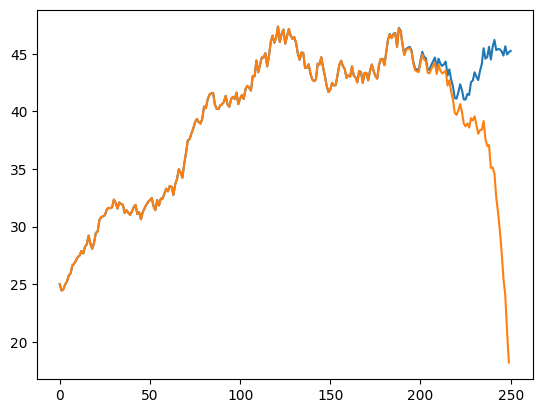

In [6]:
import matplotlib.pyplot as plt

plt.plot(S_process)
plt.plot(Call_process)